# Project 3 Yuchen Feng

In [1]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import linearmodels as plm

## I. Panel Data Models

In [2]:
#bank0 = pd.read_csv('/Users/oliverhuang/Desktop/bank1.csv')
bank0 = pd.read_csv('/Users/yifeicao/Desktop/430Project/project3/bank1.csv')

bank0.head()

,Bank,Year,Sector,EquityShareCapital,TotalShareCapital,RevaluationReserve,ReservesandSurplus,TotalReservesandSurplus,TotalShareHoldersFunds,Deposits,...,TaxOnDividend,BalanceCarriedOverToBalanceSheet,TotalAppropriations,BasicEPS.Rs..,DilutedEPS.Rs..,DIVIDENDPERCENTAGE,EquityDividendRate...,...69,efficiencies,efficienciesTime
0,Allahabad Bank,2015,Public,613.80,613.80,2648.03,10802.21,13450.23,14064.04,200644.4,...,18.96,383.23,983.93,11.39,11.39,0,16,NaN,0.849239,0.852799
1,Allahabad Bank,2016,Public,743.69,743.69,2600.47,10952.24,13552.71,14296.40,201870.2,...,0.00,-360.08,-360.08,-12.68,-12.68,0,0,NaN,0.849239,0.840842
2,Allahabad Bank,2017,Public,844.04,844.04,2556.92,6867.42,9424.35,10268.39,213603.8,...,0.00,-673.60,-673.60,-4.36,-4.36,0,0,NaN,0.849239,0.828019
3,Allahabad Bank,2018,Public,2096.84,2096.84,2943.68,4089.80,7033.48,9130.32,214334.1,...,0.00,-5290.69,-5290.69,-59.63,-59.63,0,0,NaN,0.849239,0.814288
4,Allahabad Bank,2019,Public,2096.84,2096.84,0.00,7033.48,7033.48,9130.32,214334.1,...,0.00,-13624.65,-13624.65,-65.34,-65.34,0,0,NaN,NaN,NaN


In [3]:
bank0.columns

Index(['Bank', 'Year', 'Sector', 'EquityShareCapital', 'TotalShareCapital',
       'RevaluationReserve', 'ReservesandSurplus', 'TotalReservesandSurplus',
       'TotalShareHoldersFunds', 'Deposits', 'Borrowings',
       'OtherLiabilitiesandProvisions', 'TotalCapitalandLiabilities',
       'CashandBalanceswithReserveBankofIndia',
       'BalanceswithBanksMoneyatCallandShortNotice', 'Investments', 'Advances',
       'FixedAssets', 'OtherAssets', 'TotalAssets',
       'OTHERADDITIONALINFORMATION', 'NumberofBranches', 'NumberofEmployees',
       'CapitalAdequacyRatios...', 'Tier1...', 'Tier2...', 'GrossNPA',
       'GrossNPA...', 'NetNPA', 'NetNPA...', 'NetNPAToAdvances...',
       'BillsforCollection', 'ContingentLiabilities', 'INCOME',
       'Interest.DiscountonAdvances.Bills', 'IncomefromInvestments',
       'InterestonBalancewithRBIandOtherInter.Bankfunds', 'Others',
       'TotalInterestEarned', 'OtherIncome', 'TotalIncome', 'InterestExpended',
       'PaymentstoandProvisionsforEmplo

In [4]:
data = bank0[['Bank','Year','Deposits','Borrowings','TotalCapitalandLiabilities','Investments','TotalAssets','NumberofEmployees','TotalIncome','TotalExpenditure']]

In [5]:
data.head()

,Bank,Year,Deposits,Borrowings,TotalCapitalandLiabilities,Investments,TotalAssets,NumberofEmployees,TotalIncome,TotalExpenditure
0,Allahabad Bank,2015,200644.4,14807.04,235828.4,55657.92,235828.4,24137,21712.13,21091.22
1,Allahabad Bank,2016,201870.2,14670.32,237037.9,55136.07,237037.9,23944,20795.07,21538.38
2,Allahabad Bank,2017,213603.8,21400.52,252714.3,67714.02,252714.3,23967,20304.72,20618.24
3,Allahabad Bank,2018,214334.1,12488.94,248575.8,79557.91,248575.8,23210,19051.05,23725.42
4,Allahabad Bank,2019,214334.1,12488.94,248575.8,79557.91,248575.8,0,18564.50,26898.46


In [6]:
data.describe()

,Year,Deposits,Borrowings,TotalCapitalandLiabilities,Investments,TotalAssets,NumberofEmployees,TotalIncome,TotalExpenditure
count,190.00000,1.900000e+02,190.000000,1.900000e+02,1.900000e+02,1.900000e+02,190.000000,190.000000,190.000000
mean,2017.00000,2.889426e+05,36971.550789,3.658576e+05,9.430792e+04,3.658576e+05,25996.773684,28094.203895,27654.112789
std,1.41795,4.419191e+05,67448.512360,5.675760e+05,1.566492e+05,5.675760e+05,40317.605785,38833.295702,37753.991889
min,2015.00000,0.000000e+00,0.000000,5.000000e-02,0.000000e+00,5.000000e-02,0.000000,0.000000,2.580000
25%,2016.00000,6.966244e+04,2923.992500,8.272702e+04,2.025320e+04,8.272702e+04,3641.500000,7615.830000,6985.302500
50%,2017.00000,1.845678e+05,11832.070000,2.217588e+05,6.097603e+04,2.217588e+05,14140.500000,18570.830000,18342.675000
75%,2018.00000,2.962131e+05,39479.087500,3.603336e+05,1.034880e+05,3.603336e+05,31764.750000,31682.592500,33492.647500
max,2019.00000,2.911386e+06,403017.100000,3.680914e+06,1.060987e+06,3.680914e+06,264041.000000,278083.000000,278781.300000


## 1.Data Description
###  I am using 2015-2019 Indian Banks' data, including 38 banks private and public sectors' records, and picks 9 variables out of 71 variables with 190 observations. 

In [2]:
# Bank
# Year
# Deposits(Deposits of the customers through out the year)
# Borrowings(Bank lent to other firms or individuals)
# TotalCapitalandLiabilities
# Investments(Bank investments)
# TotalAssets(Total Assets of the bankd)
# NumberofEmployees(employment of the bank)
# TotalIncome(Total Income of certain bank through out the year)
# TotalExpenditure(Total Expend of certain bank through out the year)


We are trying to explore the realtionship between Total Income and other potential variables might affect the income of the bank. This could help us to determine which aspects affects the Income most and to see whether it helps the bank to establish certain policy to adjust the economic environment. The panel attrition in the Indian Banks data is not varying too much and affects household income characteristics and the banks' income and expenditure. From this exploration process, we can find out the expenditure and deposits' influence on the banks' income, and infer the influence on the country's households income based on the banks data.

## 2. Descriptive Analysis

### Boxplot

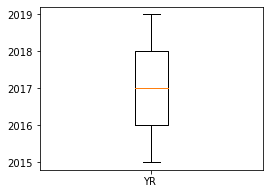

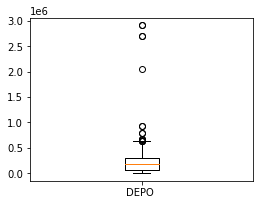

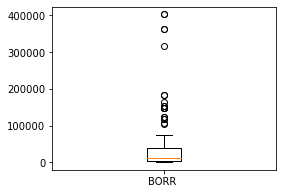

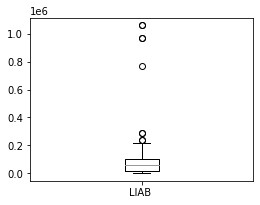

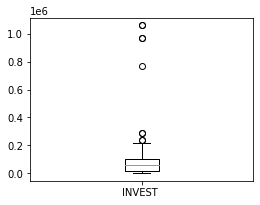

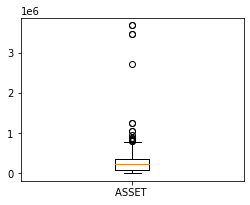

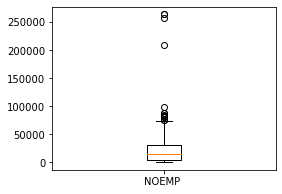

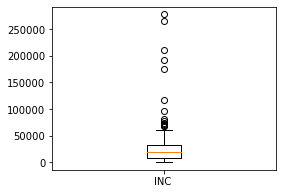

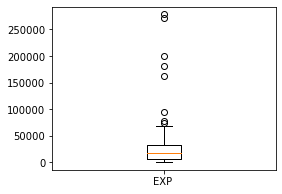

In [7]:
#'Bank','Year','Deposits','Borrowings','Investments','TotalAssets',
# 'NumberofEmployees','TotalIncome','TotalExpenditure'

BANK = data['Bank']
YR = data['Year']
DEPO = data['Deposits']
BORR = data['Borrowings']
LIAB = data['TotalCapitalandLiabilities']
INVEST = data["Investments"]
ASSET = data['TotalAssets']
NOEMP = data['NumberofEmployees']
INC = data['TotalIncome']
EXP = data['TotalExpenditure']

columns = [BANK, YR, DEPO, BORR, LIAB, INVEST, ASSET, NOEMP, INC, EXP]
fig, ax = plt.subplots(figsize=(4, 3))
ax.boxplot(YR)
plt.xticks([1], ["YR "])
plt.show()
fig, ax = plt.subplots(figsize=(4, 3))
ax.boxplot(DEPO)
plt.xticks([1], ["DEPO "])
plt.show()
fig, ax = plt.subplots(figsize=(4, 3))
ax.boxplot(BORR)
plt.xticks([1], ["BORR "])
plt.show()
fig, ax = plt.subplots(figsize=(4, 3))
ax.boxplot(INVEST)
plt.xticks([1], ["LIAB "])
plt.show()
fig, ax = plt.subplots(figsize=(4, 3))
ax.boxplot(INVEST)
plt.xticks([1], ["INVEST "])
plt.show()
fig, ax = plt.subplots(figsize=(4, 3))
ax.boxplot(ASSET)
plt.xticks([1], ["ASSET "])
plt.show()
fig, ax = plt.subplots(figsize=(4, 3))
ax.boxplot(NOEMP)
plt.xticks([1], ["NOEMP "])
plt.show()
fig, ax = plt.subplots(figsize=(4, 3))
ax.boxplot(INC)
plt.xticks([1], ["INC "])
plt.show()
fig, ax = plt.subplots(figsize=(4, 3))
ax.boxplot(EXP)
plt.xticks([1], ["EXP "])
plt.show()

### Histogram

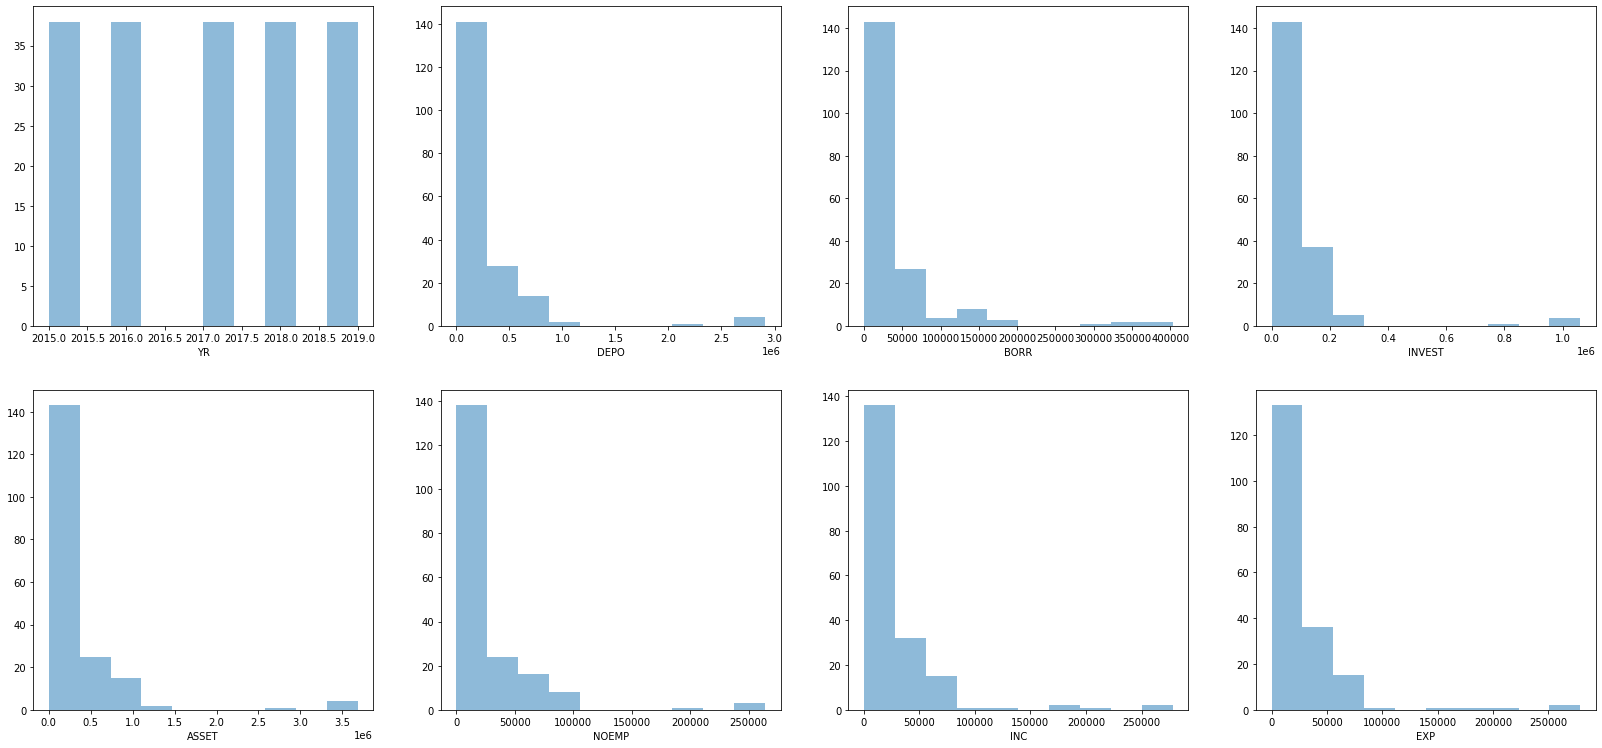

In [8]:
# YR, DEPO, BORR,LIAB, INVEST, ASSET, NOEMP, INC, EXP
#Histogram
plt.figure(figsize=(28,20))
ax1 = plt.subplot2grid((3,4), (0,0))
x1 = YR
res = plt.hist(x1,alpha = .5)
label=plt.xlabel("YR")

ax2 = plt.subplot2grid((3,4), (0,1))
x2 = DEPO
res = plt.hist(x2,alpha = .5)
label=plt.xlabel("DEPO")

ax3 = plt.subplot2grid((3,4), (0, 2))
x3 = BORR
res = plt.hist(x3,alpha = .5)
label=plt.xlabel("BORR")

ax4 = plt.subplot2grid((3,4), (0, 3))
x4 = LIAB
res = plt.hist(x4,alpha = .5)
label=plt.xlabel("LIAB")

ax5 = plt.subplot2grid((3,4), (0, 3))
x5 = INVEST
res = plt.hist(x5,alpha = .5)
label=plt.xlabel("INVEST")

ax6 = plt.subplot2grid((3,4), (1, 0))
x6 = ASSET
res = plt.hist(x6,alpha = .5)
label=plt.xlabel("ASSET")

ax7 = plt.subplot2grid((3,4), (1,1))
x7 = NOEMP
res = plt.hist(x7,alpha = .5)
label=plt.xlabel("NOEMP")

ax8 = plt.subplot2grid((3,4), (1,2))
x8 = INC
res = plt.hist(x8,alpha = .5)
label=plt.xlabel("INC")

ax9 = plt.subplot2grid((3,4), (1, 3))
x9 = EXP
res = plt.hist(x9,alpha = .5)
label=plt.xlabel("EXP")

For variable “YR” which is an categorical variable, the histogram of it is normally distributed, since it only has value 2015-2019
For the variable “DEPO” which is an independent variable, the histogram of it is right skewed.
For variable “BORR” which is an independent variable, the histogram of it is right skewed.
For the variable “INVEST” which is an independent variable, the histogram of it is right skewed.
For variable “ASSET” which is an independent variable, the histogram of it is right skewed.
For the variable “NOEMP” which is an independent variable, the histogram of it is right skewed.
For the variable “INC” which is an dependent variable, the histogram of it is right skewed.
For the variable “EXP” which is an independent variable, the histogram of it is right skewed.


### Correlation Plot

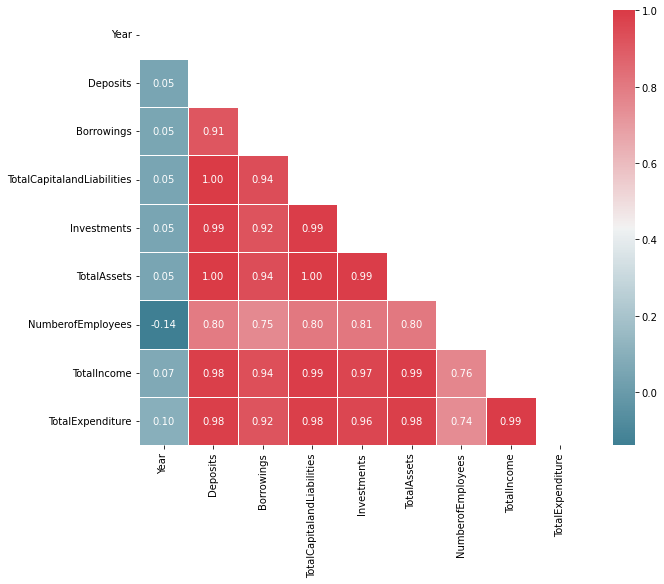

In [9]:
import seaborn as sns

sub_data =  data[['Bank','Year','Deposits','Borrowings','TotalCapitalandLiabilities','Investments',
                  'TotalAssets','NumberofEmployees','TotalIncome','TotalExpenditure']]
corr = sub_data.corr()
fig, ax = plt.subplots(figsize=(10, 8))
colormap = sns.diverging_palette(220, 10, as_cmap = True)
dropvals = np.zeros_like(corr)
dropvals[np.triu_indices_from(dropvals)] = True
sns.heatmap(corr, cmap = colormap, linewidths = .5, annot = True, fmt = ".2f", mask = dropvals)
plt.show()

From the correlation plots, we can see that the most related two set of variables are TotalAssets and Deposits, and TotalAssets with TotalCapitalandLiabilities which measures 1. The second related two variables are Investments and Deposits, as well as TotalIncome and Investments which measures 0.99. There are a lot of highly correlated variables with a measure of 0.97 and 0.98.¶

### QQ Plot

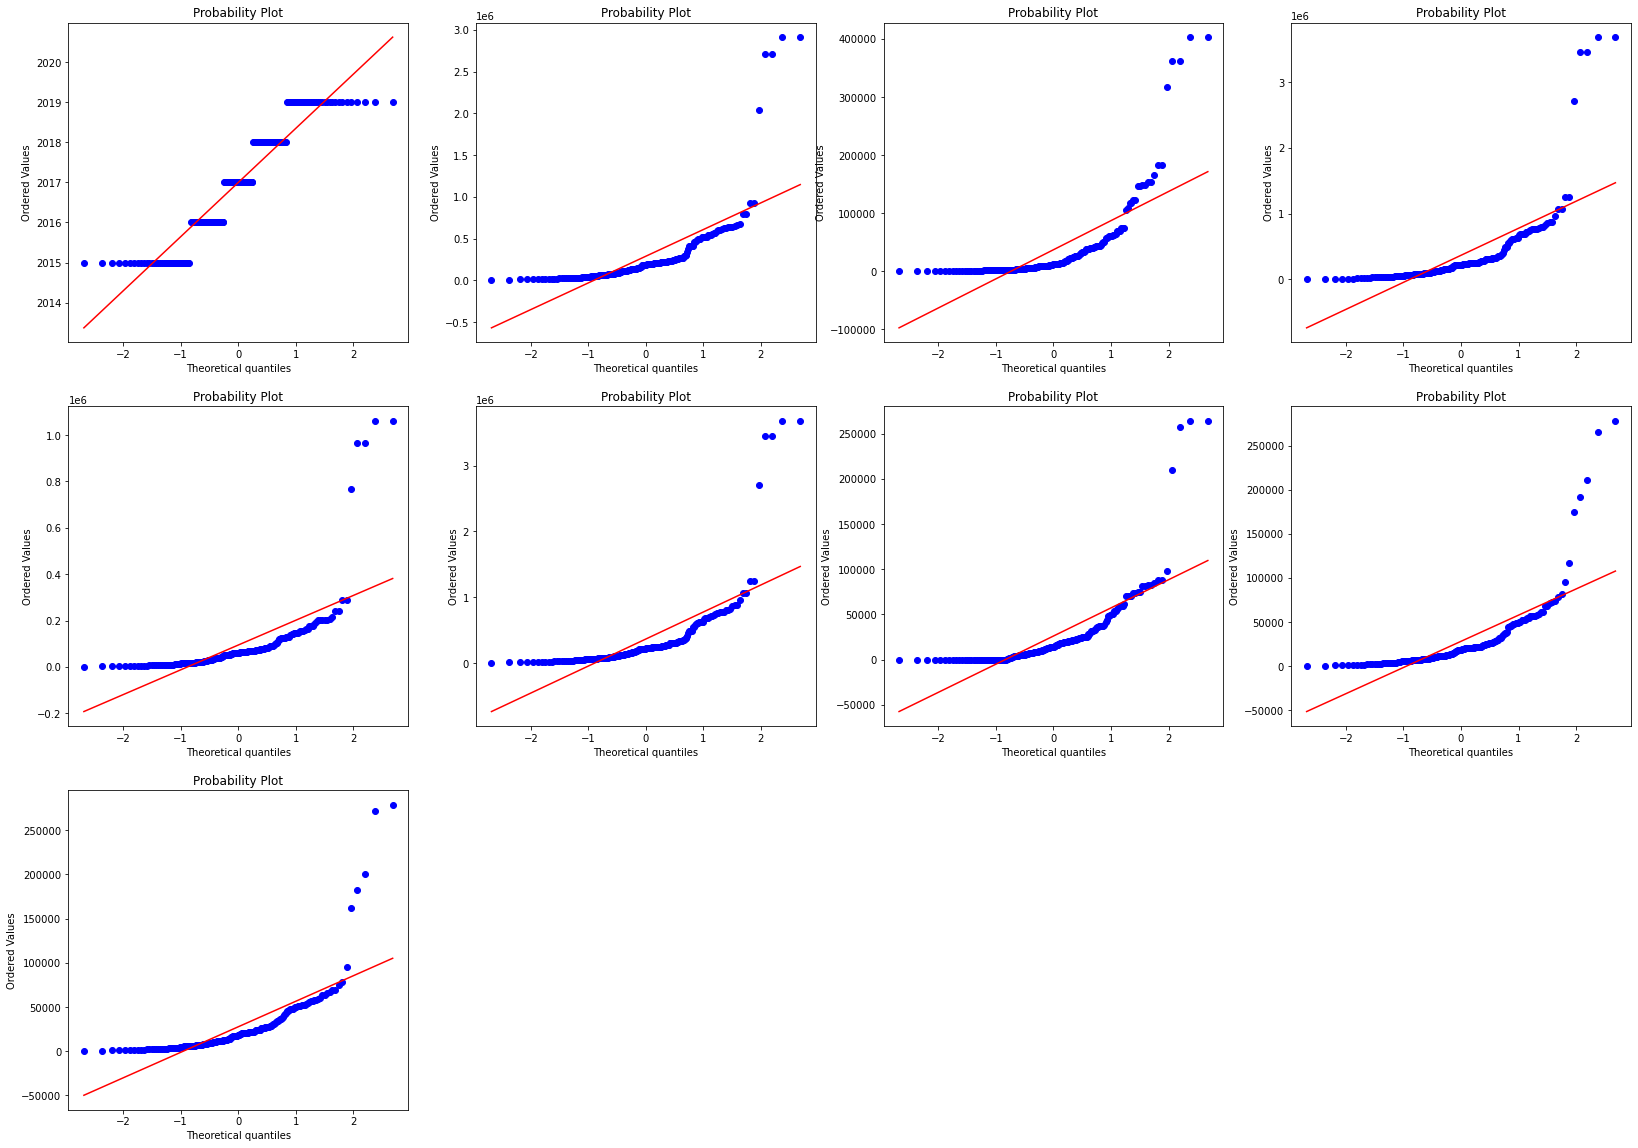

In [10]:
import numpy as np 
import scipy.stats as stats

#Year','Deposits','Borrowings','TotalCapitalandLiabilities',
#'Investments','TotalAssets','NumberofEmployees','TotalIncome','TotalExpenditure'

#QQ Plot
plt.figure(figsize=(28,20))
ax1 = plt.subplot2grid((3,4), (0,0))
x1 = data.Year
res = stats.probplot(x1,dist="norm", plot=plt)

ax2 = plt.subplot2grid((3,4), (0,1))
x2 = data.Deposits
res = stats.probplot(x2,dist="norm", plot=plt)

ax3 = plt.subplot2grid((3,4), (0, 2))
x3 = data.Borrowings
res = stats.probplot(x3,dist="norm", plot=plt)

ax4 = plt.subplot2grid((3,4), (0, 3))
x4 = data.TotalCapitalandLiabilities
res = stats.probplot(x4,dist="norm", plot=plt)

ax5 = plt.subplot2grid((3,4), (1, 0))
x5 = data.Investments
res = stats.probplot(x5,dist="norm", plot=plt)

ax6 = plt.subplot2grid((3,4), (1,1))
x6 = data.TotalAssets
res = stats.probplot(x6,dist="norm", plot=plt)

ax7 = plt.subplot2grid((3,4), (1,2))
x7 = data.NumberofEmployees
res = stats.probplot(x7,dist="norm", plot=plt)

ax8 = plt.subplot2grid((3,4), (1, 3))
x8 = data.TotalIncome
res = stats.probplot(x8,dist="norm", plot=plt)

ax9 = plt.subplot2grid((3,4), (2, 0))
x9 = data.TotalExpenditure
res = stats.probplot(x9,dist="norm", plot=plt)

plt.show()

From the QQ plot, we can see that barely a variable that fits the normal line

### Scatter Plot

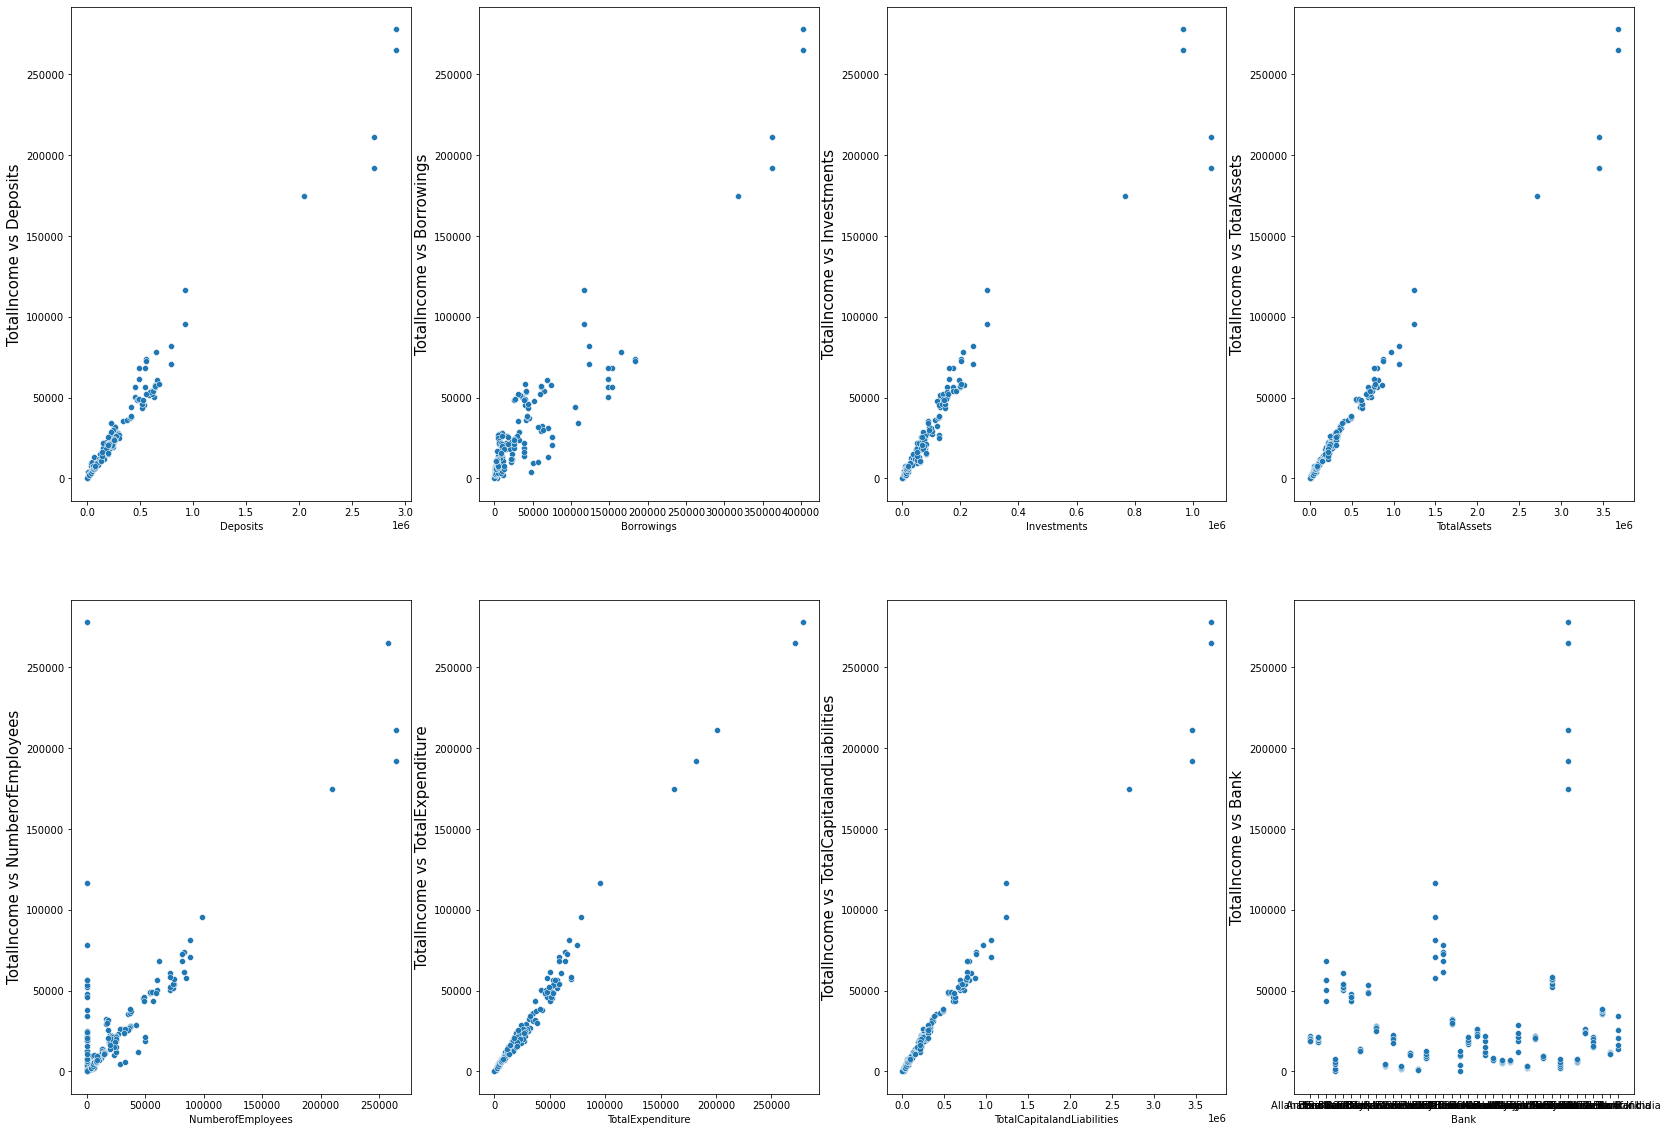

In [11]:
#'TotalCapitalandLiabilities','Deposits','Borrowings','Investments','TotalAssets',
# 'NumberofEmployees','TotalIncome','TotalExpenditure''Bank'

fig, axes = plt.subplots(2, 4, figsize=(28, 20))


sns.scatterplot(ax=axes[0,0], data = bank0, y = "TotalIncome", x = "Deposits")
axes[0,0].set_ylabel('TotalIncome vs Deposits',fontsize=15)

sns.scatterplot(ax=axes[0,1], data = bank0, y = "TotalIncome", x = "Borrowings")
axes[0,1].set_ylabel('TotalIncome vs Borrowings',fontsize=15)

sns.scatterplot(ax=axes[0,2], data = bank0, y = "TotalIncome", x = "Investments")
axes[0,2].set_ylabel('TotalIncome vs Investments',fontsize=15)

sns.scatterplot(ax=axes[0,3], data = bank0, y = "TotalIncome", x = "TotalAssets")
axes[0,3].set_ylabel('TotalIncome vs TotalAssets',fontsize=15)

sns.scatterplot(ax=axes[1,0],data = bank0, y = "TotalIncome", x = "NumberofEmployees")
axes[1,0].set_ylabel('TotalIncome vs NumberofEmployees',fontsize=15)

sns.scatterplot(ax=axes[1,1], data = bank0, y = "TotalIncome", x = "TotalExpenditure")
axes[1,1].set_ylabel('TotalIncome vs TotalExpenditure',fontsize=15)

sns.scatterplot(ax=axes[1,2], data = bank0, y = "TotalIncome", x = "TotalCapitalandLiabilities")
axes[1,2].set_ylabel('TotalIncome vs TotalCapitalandLiabilities',fontsize=15)

sns.scatterplot(ax=axes[1,3], data = bank0, y = "TotalIncome", x = "Bank")
axes[1,3].set_ylabel('TotalIncome vs Bank',fontsize=15)

plt.show()

It seems that TotalIncome vs Deposits, TotalIncome vs Investments, TotalIncome vs TotalAssets, TotalIncome vs TotalExpenditure, TotalIncome vs TotalCapitalandLiabilities have some sort of correlation

## 3. Model Fitness

### (1) Pooled Model

In [ ]:
#!pip install rpy2
#import rpy2
#import warnings
#warnings.filterwarnings('ignore')

#from rpy2.robjects import pandas2ri
#import rpy2.rinterface as rinterface
#pandas2ri.activate()

#%load_ext rpy2.ipython

In [ ]:
#%%R
#install.packages(c('plm', 'AER', 'POE5Rdata'))
#library(plm)
#library(AER)
#library(POE5Rdata)
#mod1 <- pdata.frame(data, index=c('BANK','YR'))
#head(mod1)

In [14]:
data = data.rename(columns={'Bank':'BANK', 'Year':'YR', 'Deposits':'DEPO', 'Borrowings':'BORR', 
                             'Investments':'INVEST', 'TotalAssets':'ASSET', 
                            'NumberofEmployees':'NOEMP', 'TotalIncome':'INC', 'TotalExpenditure':'EXP'})

In [15]:
data = data.set_index(['BANK', 'YR'], drop=False)

reg = plm.PooledOLS.from_formula(
    formula='INC ~ DEPO + BORR + INVEST + ASSET + NOEMP + EXP + C(YR)', data=data)
results_ols = reg.fit()

# print regression table:
table_ols = pd.DataFrame({'b': round(results_ols.params, 5),
                          'se': round(results_ols.std_errors, 5),
                          't': round(results_ols.tstats, 5),
                          'pval': round(results_ols.pvalues, 5)})
print(f'table_ols: \n{table_ols}\n')

table_ols: 
                        b         se         t     pval
ASSET             0.17228    0.01108  15.55095  0.00000
BORR             -0.15893    0.01801  -8.82382  0.00000
C(YR)[T.2015]  1457.28093  342.21247   4.25841  0.00003
C(YR)[T.2016]   705.36513  347.72019   2.02854  0.04399
C(YR)[T.2017]  1284.83484  343.53966   3.73999  0.00025
C(YR)[T.2018]  -564.01433  359.50278  -1.56887  0.11844
C(YR)[T.2019]  -377.06111  368.92896  -1.02204  0.30814
DEPO             -0.15739    0.01342 -11.73132  0.00000
EXP               0.75605    0.02919  25.89939  0.00000
INVEST           -0.04669    0.00815  -5.72779  0.00000
NOEMP            -0.02266    0.00685  -3.31023  0.00113



In [16]:
print(results_ols)

                          PooledOLS Estimation Summary                          
Dep. Variable:                    INC   R-squared:                        0.9976
Estimator:                  PooledOLS   R-squared (Between):              0.9995
No. Observations:                 190   R-squared (Within):               0.9536
Date:                Thu, Dec 01 2022   R-squared (Overall):              0.9976
Time:                        19:02:16   Log-likelihood                   -1702.7
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      7522.6
Entities:                          38   P-value                           0.0000
Avg Obs:                       5.0000   Distribution:                  F(10,179)
Min Obs:                       5.0000                                           
Max Obs:                       5.0000   F-statistic (robust):           1.09e+04
                            

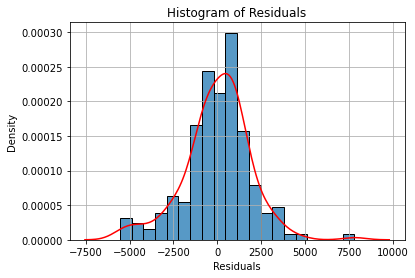

In [46]:
sns.kdeplot(results_ols.resids, color = "red")
sns.histplot(results_ols.resids, stat = "density")
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.grid()

### (2) Fixed Effects

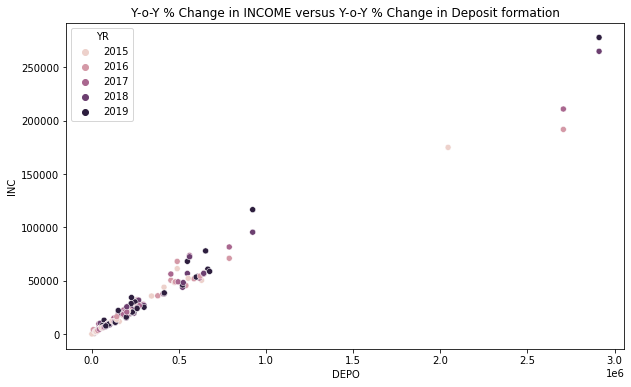

In [17]:
# Show relationship between Income and Deposit across different banks and years
plt.figure(figsize=(10,6))

sns.scatterplot(x=data['DEPO'],  
                y=data['INC'],
                hue=data['YR']).set(title=                
                'Y-o-Y % Change in INCOME versus Y-o-Y % Change in Deposit formation')
plt.show()

There seems to be a linear relation between Y-o-Y % growth in income versus Y-o-Y % growth in deposits existing across all banks in the data panel. This bodes well for fitting a linear model using the OLS technique.

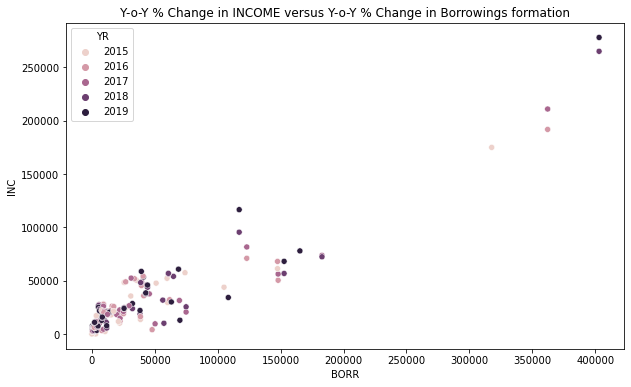

In [18]:
# Show relationship between Income and Borrowings across different banks and years
plt.figure(figsize=(10,6))

sns.scatterplot(x=data['BORR'],  
                y=data['INC'],
                hue=data['YR']).set(title=                
                'Y-o-Y % Change in INCOME versus Y-o-Y % Change in Borrowings formation')
plt.show()

There seems to be a linear relation between Y-o-Y % growth in income versus Y-o-Y % growth in borrowings existing across all banks in the data panel. This bodes well for fitting a linear model using the OLS technique.

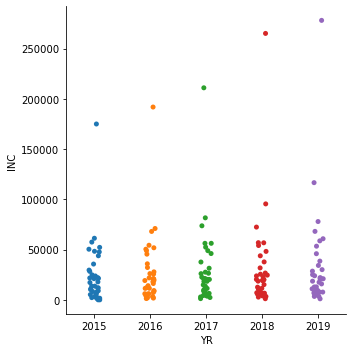

In [19]:
# Scatterplot over Years
sns.catplot(data=data, x="YR", y="INC")

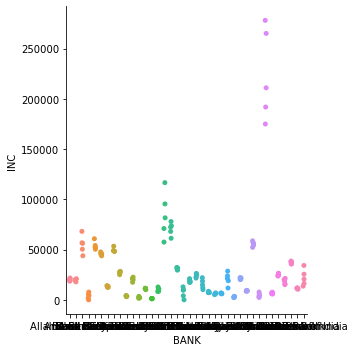

In [20]:
# Scatterplot over Banks
sns.catplot(data=data, x="BANK", y="INC")

The data points seem to be correlated with different years and banks, with an changing trend of income.

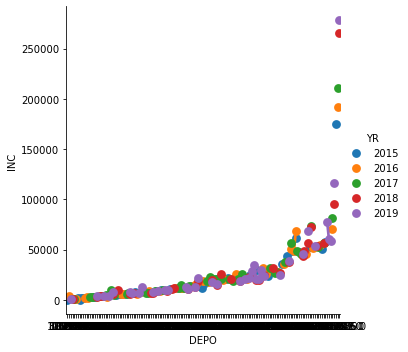

In [30]:
sns.catplot(data=data, x="DEPO", y="INC", hue="YR", kind="point")

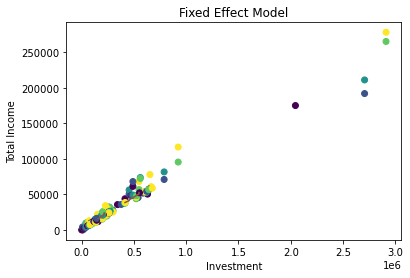

In [51]:
# Income ~ Deposits

fe = smf.ols("INC ~ DEPO + C(YR)", data=data).fit()

fe_data = data.assign(y_hat = fe.fittedvalues)

plt.scatter(data.DEPO, data.INC, c=data.YR)

from itertools import islice

for BANK in islice(fe_data['BANK'].unique(), 0, 3):
    plot_df = fe_data.query(f"BANK=='{BANK}'")
    plt.plot(plot_df.DEPO, plot_df.y_hat, c="C5")

#for YR in fe_data['YR'].unique():
#    plot_df = fe_data.query(f"YR=='{YR}'")
#    plt.plot(plot_df.DEPO, plot_df.y_hat, c="C5")

plt.title("Fixed Effect Model")
plt.xlabel("Investment")
plt.ylabel("Total Income");

In [41]:
df_panel_group_means = data.groupby(data['YR']).mean()
 
print(df_panel_group_means)

               DEPO          BORR  TotalCapitalandLiabilities         INVEST  \
YR                                                                             
2015  249763.953947  30750.806053               316385.118158   79557.725526   
2016  280960.388684  34391.355000               354041.267105   92179.955789   
2017  289264.352368  38514.686316               367199.248158   97445.437368   
2018  307971.819474  40465.420000               390740.897895  100519.396316   
2019  316752.684211  40735.486579               400921.306842  101837.075263   

              ASSET         NOEMP           INC           EXP  
YR                                                             
2015  316385.118158  28993.315789  24315.658947  22380.367368  
2016  354041.267105  32437.342105  26201.565789  25430.967895  
2017  367199.248158  29398.552632  27961.730789  26823.871579  
2018  390740.897895  27500.473684  29787.132368  30756.684474  
2019  400921.306842  11654.184211  32204.931579  32878.

In [22]:
reg_fe = plm.PanelOLS.from_formula(
    formula='INC ~ DEPO + BORR + INVEST + ASSET + NOEMP + EXP + C(YR)', data=data)
results_fe = reg_fe.fit()

table_fe = pd.DataFrame({'b': round(results_fe.params, 5),
                         'se': round(results_fe.std_errors, 5),
                         't': round(results_fe.tstats, 5),
                         'pval': round(results_fe.pvalues, 5)})
print(f'table_fe: \n{table_fe}\n')

table_fe: 
                        b         se         t     pval
ASSET             0.17228    0.01108  15.55095  0.00000
BORR             -0.15893    0.01801  -8.82382  0.00000
C(YR)[T.2015]  1457.28093  342.21247   4.25841  0.00003
C(YR)[T.2016]   705.36513  347.72019   2.02854  0.04399
C(YR)[T.2017]  1284.83484  343.53966   3.73999  0.00025
C(YR)[T.2018]  -564.01433  359.50278  -1.56887  0.11844
C(YR)[T.2019]  -377.06111  368.92896  -1.02204  0.30814
DEPO             -0.15739    0.01342 -11.73132  0.00000
EXP               0.75605    0.02919  25.89939  0.00000
INVEST           -0.04669    0.00815  -5.72779  0.00000
NOEMP            -0.02266    0.00685  -3.31023  0.00113



In [56]:
print(results_fe)

                          PanelOLS Estimation Summary                           
Dep. Variable:                    INC   R-squared:                        0.9976
Estimator:                   PanelOLS   R-squared (Between):              0.9995
No. Observations:                 190   R-squared (Within):               0.9536
Date:                Thu, Dec 01 2022   R-squared (Overall):              0.9976
Time:                        19:04:05   Log-likelihood                   -1702.7
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      7522.6
Entities:                          38   P-value                           0.0000
Avg Obs:                       5.0000   Distribution:                  F(10,179)
Min Obs:                       5.0000                                           
Max Obs:                       5.0000   F-statistic (robust):           1.09e+04
                            

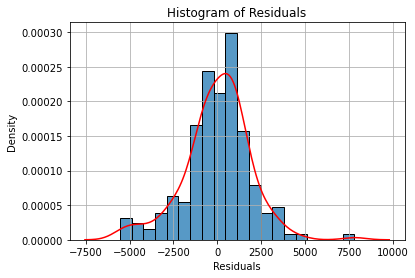

In [44]:
sns.kdeplot(results_fe.resids, color = "red")
sns.histplot(results_fe.resids, stat = "density")
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.grid()

### (3) Random Effects

In [23]:
reg_re = plm.RandomEffects.from_formula(
    formula='INC ~ DEPO + BORR + INVEST + ASSET + NOEMP + EXP + C(YR)', data=data)
results_re = reg_re.fit()

table_re = pd.DataFrame({'b': round(results_re.params, 5),
                         'se': round(results_re.std_errors, 5),
                         't': round(results_re.tstats, 5),
                         'pval': round(results_re.pvalues, 5)})
print(f'table_re: \n{table_re}\n')

table_re: 
                        b         se         t     pval
ASSET             0.16829    0.01207  13.94258  0.00000
BORR             -0.15100    0.01947  -7.75698  0.00000
C(YR)[T.2015]  1466.40548  349.16189   4.19979  0.00004
C(YR)[T.2016]   712.18889  355.01674   2.00607  0.04635
C(YR)[T.2017]  1281.84395  350.65194   3.65560  0.00034
C(YR)[T.2018]  -558.74186  367.77204  -1.51926  0.13046
C(YR)[T.2019]  -364.00708  376.26642  -0.96742  0.33464
DEPO             -0.15289    0.01446 -10.57524  0.00000
EXP               0.75306    0.03035  24.81147  0.00000
INVEST           -0.04730    0.00884  -5.35321  0.00000
NOEMP            -0.02256    0.00680  -3.32002  0.00109



In [54]:
print(results_re)

                        RandomEffects Estimation Summary                        
Dep. Variable:                    INC   R-squared:                        0.9969
Estimator:              RandomEffects   R-squared (Between):              0.9995
No. Observations:                 190   R-squared (Within):               0.9541
Date:                Thu, Dec 01 2022   R-squared (Overall):              0.9976
Time:                        19:04:19   Log-likelihood                   -1697.1
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      5797.4
Entities:                          38   P-value                           0.0000
Avg Obs:                       5.0000   Distribution:                  F(10,179)
Min Obs:                       5.0000                                           
Max Obs:                       5.0000   F-statistic (robust):             8506.9
                            

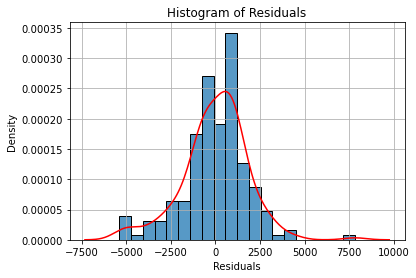

In [45]:
sns.kdeplot(results_re.resids, color = "red")
sns.histplot(results_re.resids, stat = "density")
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.grid()

## Comparing Models

In [24]:
# Pooled
print(f'table_ols: \n{table_ols}\n')

table_ols: 
                        b         se         t     pval
ASSET             0.17228    0.01108  15.55095  0.00000
BORR             -0.15893    0.01801  -8.82382  0.00000
C(YR)[T.2015]  1457.28093  342.21247   4.25841  0.00003
C(YR)[T.2016]   705.36513  347.72019   2.02854  0.04399
C(YR)[T.2017]  1284.83484  343.53966   3.73999  0.00025
C(YR)[T.2018]  -564.01433  359.50278  -1.56887  0.11844
C(YR)[T.2019]  -377.06111  368.92896  -1.02204  0.30814
DEPO             -0.15739    0.01342 -11.73132  0.00000
EXP               0.75605    0.02919  25.89939  0.00000
INVEST           -0.04669    0.00815  -5.72779  0.00000
NOEMP            -0.02266    0.00685  -3.31023  0.00113



In [25]:
# Fixed Effect
print(f'table_fe: \n{table_fe}\n')

table_fe: 
                        b         se         t     pval
ASSET             0.17228    0.01108  15.55095  0.00000
BORR             -0.15893    0.01801  -8.82382  0.00000
C(YR)[T.2015]  1457.28093  342.21247   4.25841  0.00003
C(YR)[T.2016]   705.36513  347.72019   2.02854  0.04399
C(YR)[T.2017]  1284.83484  343.53966   3.73999  0.00025
C(YR)[T.2018]  -564.01433  359.50278  -1.56887  0.11844
C(YR)[T.2019]  -377.06111  368.92896  -1.02204  0.30814
DEPO             -0.15739    0.01342 -11.73132  0.00000
EXP               0.75605    0.02919  25.89939  0.00000
INVEST           -0.04669    0.00815  -5.72779  0.00000
NOEMP            -0.02266    0.00685  -3.31023  0.00113



In [26]:
# Random Effect
print(f'table_re: \n{table_re}\n')

table_re: 
                        b         se         t     pval
ASSET             0.16829    0.01207  13.94258  0.00000
BORR             -0.15100    0.01947  -7.75698  0.00000
C(YR)[T.2015]  1466.40548  349.16189   4.19979  0.00004
C(YR)[T.2016]   712.18889  355.01674   2.00607  0.04635
C(YR)[T.2017]  1281.84395  350.65194   3.65560  0.00034
C(YR)[T.2018]  -558.74186  367.77204  -1.51926  0.13046
C(YR)[T.2019]  -364.00708  376.26642  -0.96742  0.33464
DEPO             -0.15289    0.01446 -10.57524  0.00000
EXP               0.75306    0.03035  24.81147  0.00000
INVEST           -0.04730    0.00884  -5.35321  0.00000
NOEMP            -0.02256    0.00680  -3.32002  0.00109



In [27]:
# print results:
theta_hat = results_re.theta.iloc[0, 0]
print(f'theta_hat: {theta_hat}\n')

theta_hat: 0.15428909362187448



## Hausman Test

In [28]:
b_fe = results_fe.params
b_fe_cov = results_fe.cov
b_re = results_re.params
b_re_cov = results_re.cov

# Hausman test of FE vs. RE
# (I) find overlapping coefficients:
common_coef = set(results_fe.params.index).intersection(results_re.params.index)

# (II) calculate differences between FE and RE:
b_diff = np.array(results_fe.params[common_coef] - results_re.params[common_coef])
df = len(b_diff)
b_diff.reshape((df, 1))
b_cov_diff = np.array(b_fe_cov.loc[common_coef, common_coef] -
                      b_re_cov.loc[common_coef, common_coef])
b_cov_diff.reshape((df, df))

# (III) calculate test statistic:
stat = abs(np.transpose(b_diff) @ np.linalg.inv(b_cov_diff) @ b_diff)
pval = 1 - stats.chi2.cdf(stat, df)

print(f'stat: {stat}\n')
print(f'pval: {pval}\n')

stat: 1.3583431967218442

pval: 0.9997661753710575



/var/folders/x_/xncp_7mx2z916_tmlx7jslx80000gn/T/ipykernel_61185/3666937731.py:11: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  b_diff = np.array(results_fe.params[common_coef] - results_re.params[common_coef])
/var/folders/x_/xncp_7mx2z916_tmlx7jslx80000gn/T/ipykernel_61185/3666937731.py:11: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  b_diff = np.array(results_fe.params[common_coef] - results_re.params[common_coef])
/var/folders/x_/xncp_7mx2z916_tmlx7jslx80000gn/T/ipykernel_61185/3666937731.py:14: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  b_cov_diff = np.array(b_fe_cov.loc[common_coef, common_coef] -
/var/folders/x_/xncp_7mx2z916_tmlx7jslx80000gn/T/ipykernel_61185/3666937731.py:15: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. U

Based on the large p-value, we "fail to reject H0", and conclude that we should use the random effects model